## Below type in the specifications for how you want to run the example with CERN news pieces

For language to be understood by computers, it needs to be turned into a numerical form. That begins with separating the words in a document into units called tokens. Here, the example uses simple tokens of singular words which are lemmatized: For the words the "base" form is found out with a statistical approach.

<b>There are different ways to do tokenization (e.g., n-grams) and lemmatization (e.g., stemming or doing nothing). Quickly search for the benefits of the different approaches and decide what you want to choose for the few of such selected options for parameters below.</b>

In [1]:
'''
Choose below "NO" for no stopword removal, "YES" for stopword removal
'''
chosen_stopword_removal = "NO"

'''
Choose below "YES" to lemmatize documents, else choose "NO"
'''
chosen_lemmatization = "NO"

'''
Choose below "BOW" or "TFIDF" for vectorization
'''
chosen_vectorization = "BOW"

Below are some different types of machine learning algorithms. Acquaint yourself with the basic pros and cons of each. If you wish to, you can also find other types of ML to learn about at scikit-learn.org.

__[Neural Network](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)__

__[Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html#svm)__

__[Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html)__

__[Decision Tree](https://scikit-learn.org/stable/modules/tree.html#tree)__

Some specifics are required to the algorithms such as how many iterations to use, how to scale data, etc. If you want to get acquainted with the different such options, use the links above to learn about the parameters and their effects.

However, <b>consider: Who would know which parameters to use and why if you were to implement AI in your organization?</b>

In [2]:
'''
Choose below
"KNN" for nearest neighbours
"NN" for neural network
"SVM" for support vector machine
"Tree" for decision-tree
'''
chosen_algorithm = "Tree"

Here we import the basic libraries required for data analysis with Python!

In [3]:
#Here we import the basic Python data analytics libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd   # includes tools used in reading data
import numpy as np   # includes tools for numerical calculus
import matplotlib.pyplot as plt  # includes tools used in plotting data

Below we define a function that we can use to track how much time and memory the code uses between a certain part of running the code.

In [4]:
import psutil
import time

def track_memory_and_time(start_time=None):
    """
    Track memory usage and elapsed time since a specific point in the code.

    Parameters:
    - start_time: Optional parameter. If provided, it should be the result of a previous call to time.time().

    Returns:
    - memory_usage: Current memory usage in bytes.
    - elapsed_time: Elapsed time in seconds since the specified start time.
    """

    # Get memory usage
    memory_usage = psutil.virtual_memory().used

    # Get elapsed time
    current_time = time.time()
    elapsed_time = current_time - start_time if start_time else 0

    return memory_usage, elapsed_time

In [5]:
#Defining and creating a function with which you can later on get the accuracy of the ML/AI algorithm
def accuracy(clf, X_test, y_test):
    score = str(clf.score(X_test, y_test)*100)+'%'

    return score

In [6]:
#this is just defining and creating a function with which you can later on compare the AI predictions to the original data
def find_differences(clf, X_test, y_test):
    
    predictions = []
    test_labels = []
    column_names = list(X_test.columns.values)
    events = pd.DataFrame(columns=list(X_test.columns.values))
    
    for i in range(len(list(y_test))-1):
        if str(clf.predict([X_test.values[i+1]])[0]) != list(y_test)[i+1]:
            predictions.append(clf.predict([X_test.values[i+1]])[0])
            test_labels.append(list(y_test)[i+1])
            events.loc[len(events)] = X_test.values[i+1]
               
    df = pd.DataFrame(columns=['Prediction', 'Original label'])
    df['Prediction']= predictions
    df['Original label']= test_labels

    df = pd.concat([df, events], axis=1)
    return df

In [7]:
#Move this block to the location in the code from where you want to start tracking
start_time = time.time()

In [8]:
#Here we import the different ML algorithms from the scikit-learn library

from sklearn.neural_network import MLPClassifier
#Neural Network

from sklearn import svm
#Support Vector Machine

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
#Nearest Neighbours

from sklearn import tree
#Decision tree

In [9]:
def choose_algorithm(name):
    if name == "NN":
        clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    elif name == "KNN":
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import StandardScaler
        clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])
    elif name == "SVM":
        clf = svm.SVC()
    else:
        clf = tree.DecisionTreeClassifier()
        
    return clf

## Qualitative

For supervised machine learning, you need a dataset and correct labels to give to it.

<b>For your work, think of an AI task using qualitative data, e.g., text of images, that would be useful for you and determine the type of data you would need to teach to an AI: Where or how can you get 10k+ examples with the correct "labels" assigned to the datapoints - what resources would you need to create/retrieve this data?</b>

The example here uses text pieces.

In [10]:
#! conda install -c conda-forge spacy

In [11]:
! python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 682.7 kB/s eta 0:00:19
     --------------------------------------- 0.0/12.8 MB 667.8 kB/s eta 0:00:20
     - -------------------------------------- 0.3/12.8 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 4.4 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 5.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 6.6 MB/s eta 0:00:02
     ------ --------------------------------- 2.2/12.8 MB 7.5 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 8.4 MB/s eta 0:00:02
     ----------- ---------------------------- 3.6/12.8 MB 9.1 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 9.0 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 9.5 MB/s eta 0:00:01
     ---------------- ----------------------- 5.4/12.8 MB

In [12]:
'''
Importing the Python libraries to analyze and treat text data.
'''
import re
import spacy
spacy_model = "en_core_web_sm"

Opening up the file with the data, this is the example, if you have different data in mind, you can use that...

In [13]:
df = pd.read_excel('cern_news_data.xlsx')
#Choosing the columns we want for our analysis
df = df[['Document', 'Label']]
#Dropping rows with empty data
df = df.dropna(how = 'any',axis = 0).reset_index(drop = True)
#Dropping rows of duplicate text documents
df = df.drop_duplicates(subset="Document")
df = df.sample(frac = 1).reset_index(drop=True)
df.head()

,Document,Label
0,We want to minimize the damage to normal tissu...,Human capital
1,Marsollier said the weasel died - and little r...,Technology
2,"We're out of kindergarten, but only in about t...",Human capital
3,Sign up to receive our weekly newsletter of th...,Human capital
4,Ministry of Foreign Affairs\nQuote\nPrime Mini...,Human capital


<b>What operations do you need to perform on the data you have to clean it up?</b>

In [14]:
#Making a new list of text documents with extra whitespace and asterisks and quotation marks 
#that would complicate further cleansing removed
cleaner_documents = [text.replace("*", " ").replace('"','') for text in list(df['Document'])]
clean_documents = [re.sub('[\s+]', ' ',text) for text in cleaner_documents]

#Adding the cleansed documents to the dataframe
df['Document Clean'] = clean_documents

In [15]:
#Seeing what the cleansed documents look like
for clean_document in clean_documents[:5]:
    print(clean_document+"\n")

We want to minimize the damage to normal tissues.'' The device was adapted from a pixel-detecting tool that physicists use at the Large Hadron Collider, the underground tunnel with a diameter of nearly 17 miles at the European Organization for Nuclear Research, known as CERN. It was originally designed to track particles as they moved through the accelerator tube.

Marsollier said the weasel died - and little remains of it. Officials of the European Organization for Nuclear Research, known by its French acronym CERN, have been gearing up for new data from the 27-kilometre circuit that runs underground on the Swiss-French border. 

We're out of kindergarten, but only in about third grade.'' In three decades of searching, the experimentalists have not found any trace of Dr. Glashow's garbage, notwithstanding occasional rumors that the dark matter particle, the secret ingredient of the universe, has been spotted in some underground tank or fleeing through the detectors at a place like CER

In [16]:
#Lemmatization:
lemmatized = True
if chosen_lemmatization == "NO":
    lemmatized = False

#Loading a python library for natural language processing
nlp = spacy.load(spacy_model, disable=['merge_noun_chunks'])

#Creating a function that will dothe basic tokenization of the documents
def basic_tokenizer(document, lemmatized=lemmatized):
    #Converting the text document into a Spacy document
    document = nlp(document)
    if chosen_stopword_removal == "YES":
        if not lemmatized:
            tokenized = [token.text.lower() for token in document if token.ent_iob == 2 #<- This removes known entities
                         and not (token.is_stop or token.is_punct or token.is_space or token.like_num 
                                  or token.like_url or token.like_email)]
        if lemmatized:
            tokenized = [token.lemma_.lower() for token in document if token.ent_iob == 2 #<- This removes known entities
                         and not (token.is_stop or token.is_punct or token.is_space or token.like_num 
                                  or token.like_url or token.like_email)]
    else:
        if not lemmatized:
            tokenized = [token.text.lower() for token in document if token.ent_iob == 2 #<- This removes known entities
                         and not (token.is_punct or token.is_space or token.like_num 
                                  or token.like_url or token.like_email)]
        if lemmatized:
            tokenized = [token.lemma_.lower() for token in document if token.ent_iob == 2 #<- This removes known entities
                         and not (token.is_punct or token.is_space or token.like_num 
                                  or token.like_url or token.like_email)]        
    #Returns a list of tokens
    return tokenized

#Initializing a list where to add the treated documents
tokenized_documents = []

for document in clean_documents:
    #using basic tokenizer on the document with Spacy's chunks disabled
    tokenized_documents.append(basic_tokenizer(document))

#Adding the tokenized documents to the dataframe
df['Tokenized'] = tokenized_documents

#printing a few examples of what the treated documents look like now
for i in range(5):
    print("Cleansed: "+clean_documents[i]+"\n")
    print("Tokenized: "+str(tokenized_documents[i])+"\n")

Cleansed: We want to minimize the damage to normal tissues.'' The device was adapted from a pixel-detecting tool that physicists use at the Large Hadron Collider, the underground tunnel with a diameter of nearly 17 miles at the European Organization for Nuclear Research, known as CERN. It was originally designed to track particles as they moved through the accelerator tube.

Tokenized: ['we', 'want', 'to', 'minimize', 'the', 'damage', 'to', 'normal', 'tissues', 'the', 'device', 'was', 'adapted', 'from', 'a', 'pixel', 'detecting', 'tool', 'that', 'physicists', 'use', 'at', 'the', 'large', 'hadron', 'collider', 'the', 'underground', 'tunnel', 'with', 'a', 'diameter', 'of', 'at', 'known', 'as', 'it', 'was', 'originally', 'designed', 'to', 'track', 'particles', 'as', 'they', 'moved', 'through', 'the', 'accelerator', 'tube']

Cleansed: Marsollier said the weasel died - and little remains of it. Officials of the European Organization for Nuclear Research, known by its French acronym CERN, ha

After the documents have been tokenized and treated as still words, it's relevant to turn the text into numeric form that computer algorithms can understand. Two common ways are TFIDF and BOW vectorizations. Acquaint yourself with both, and choose which one you want to use.

Do you want to use __[TFIDF](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#)__ or __[Bag-of-Words](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)__ vectorization?

<b>Explain why you decided as you did</b>

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#the dummy function that returns the already tokenized document
def id_fun(already_tokenized):
    return already_tokenized

#initializing tf-idf
if chosen_vectorization == "TFIDF":
    vectorizer = TfidfVectorizer(
        analyzer='word',
        tokenizer=id_fun,
        preprocessor=id_fun,
        token_pattern=None)
    
#initializing bag-of-words
else:
    vectorizer = CountVectorizer(
        analyzer='word',
        tokenizer=id_fun,
        preprocessor=id_fun,
        token_pattern=None)
    
#implementing the vectorization
vectorized = vectorizer.fit_transform(tokenized_documents)
#tweaking the form of the data for analysis
dense = vectorized.todense()

In [18]:
'''
Making a simple function that will name all the columns 
in the dataset of the vectorized documents
'''

def name_x(dense, doc):
    shape = dense.shape
    # Generate column names with running numeration
    column_names = [f'x_{i+1}' for i in range(shape[1])]

    data = dense

    df = pd.DataFrame(data, columns=column_names)
    df['Clean'] = doc
    
    return df

In [19]:
'''
Defining which part of the data is the data and which one is the label,
using the function defined just previously
'''

X = name_x(dense, df['Document Clean'])
y =  df['Label']

#printing out a small example of what the data looks like
X.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_5428,x_5429,x_5430,x_5431,x_5432,x_5433,x_5434,x_5435,x_5436,Clean
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,We want to minimize the damage to normal tissu...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marsollier said the weasel died - and little r...
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"We're out of kindergarten, but only in about t..."
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sign up to receive our weekly newsletter of th...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ministry of Foreign Affairs Quote Prime Minist...


<b>What are the cleaning operations performed above on the CERN datasets? Try to search for what they do and think about why they should/should not be performed.</b>

Then we split the found data to training and testing data. 
Sometimes we also use validation data. 

<b>What are common splits in percentages</b>

In [20]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [21]:
#Removing the non-numerical column from the data before passing this on to the ML algorithms
X_train = X_Train.drop(['Clean'], axis =1)
X_test = X_Test.drop(['Clean'], axis =1)

In [22]:
#Move this block to the location in the code from where you want to start tracking
start_time = time.time()

Now choosing and fitting the ML algorithm you chose earlier.

In [23]:
name = chosen_algorithm
clf = choose_algorithm(name).fit(X_train, y_train)

In [24]:
'''
Move this block to where you want to stop the
tracking of used time and memory of the code.
'''

#start_time = time.time()
# Call the function to get memory usage and elapsed time
memory_used, time_elapsed = track_memory_and_time(start_time)

print(f"Memory Used: {memory_used} bytes")
print(f"Time Elapsed: {time_elapsed} seconds")

Memory Used: 8584867840 bytes
Time Elapsed: 0.5553514957427979 seconds


The block below prints out the accuracy of the ML algorithm on the test set.
If used algorithm is the decision tree, it also prints out the visualization of the tree.

<b>How could you check the accuracy? Think of a strategy depending on the used algorithm.</b>

Consider cases with correct labels in the training data and cases with unclear cases in the training data.

The accuracy of the algorithm is: 
73.04075235109718%


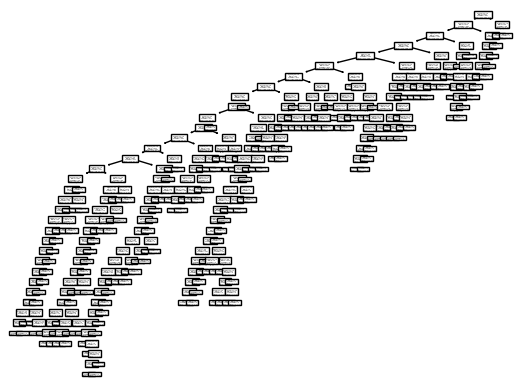

In [25]:
print("The accuracy of the algorithm is: ")
print(accuracy(clf, X_test, y_test))
if chosen_algorithm == "Tree":
    tree.plot_tree(clf)

In [26]:
#Creating a function that will identify when the algorithm diverged from the original label in the dataset
def find_differences(clf, X_test, y_test):
    
    predictions = []
    test_labels = []
    column_names = list(X_test.columns.values)
    events = pd.DataFrame(columns=list(X_test.columns.values))
    
    for i in range(len(list(y_test))-1):
        predict = [X_test.drop(columns="Clean", axis=1).values[i+1]]
        prediction = str(clf.predict(predict)[0])
        if str(clf.predict(predict)[0]) != list(y_test)[i+1]:
            predictions.append(prediction)
            test_labels.append(list(y_test)[i+1])
            events.loc[len(events)] = X_test.values[i+1]
            
    df = pd.DataFrame(columns=['Prediction', 'Original label'])
    df['Prediction']= predictions
    df['Original label']= test_labels

    df = pd.concat([df, events], axis=1)
    return df

In [27]:
#Creating a function that will find the documents that the algorithm diverged on
def get_original_doc(differences):
    df = differences(['Prediction', 'Original label', 'Clean'])
    return df

In [28]:
print("Instances in which the algorithm prediction diverged from the original label were: ")
df = find_differences(clf, X_Test, y_test)[['Prediction', 'Original label', 'Clean']]
pd.set_option('display.max_colwidth', 0)
display(df)

Instances in which the algorithm prediction diverged from the original label were: 


,Prediction,Original label,Clean
0,Human capital,Scientific knowledge,"A triumph of the human spirit. Gian Guidice, Head of Theoretical Physics at CERN (the European Organization for Nuclear Research) said: Hawking's results are a constant source of inspiration for theoretical research done at CERN. Hawking has been an inspiration to generations of young people across the world."
1,Human capital,Scientific knowledge,"The second was just one 86,400th of an Earth day. In this March 30, 2010 file picture the globe of the European Organization for Nuclear Research, CERN, is illuminated outside Geneva, Switzerland. In the 20th century, we apes got so good at measurement that the uncertainty and variations in these grubby natural quantities began to be a problem."
2,Human capital,Scientific knowledge,"If they are from the dark matter, we will know the location. Prototypes of instruments to be used in the Dampe research were taken to CERN, the European Organization for Nuclear Research, to be calibrated, the first time this has been done with a large detector from China. Zang took part in all the calibrations."
3,Scientific knowledge,Technology,"The largest scientific machine went offline when a weasel-like rodent bit through its cables and also caused small damage to some equipment. Based near Geneva in Switzerland, LHC, known as the world's largest atom smasher, was temporarily disabled due to a little weasel, announced officials at European Organization for Nuclear Research, also known as CERN. The 17-mile long underground setup and machines halted on Thursday night, the CERN report added."
4,Technology,Human capital,"scientific and technical capacity - Kucinskis RIGA, Sep 20, BNS - The European Organization for Nuclear Research (CERN) is an important partner to Latvia in building scientific and technical capacity, Prime Minister Maris Kucinskis (Greens/Farmers) told BNS. Kucinskis is visiting Geneva today, where he has been to the CERN council and met with CERN Director General Fabiola Gianotti to discuss cooperation between Latvia and CERN and acquaint himself with the scientific achievements of CERN."
...,...,...,...
81,Technology,Human capital,"Collaboration between Turkish researchers and the European Organization for Nuclear Research, also known as CERN, will help Turkey's advance in science and technology, a senior university professor involved in the joint effort told Anadolu Agency Wednesday. In March, Turkey's Istanbul Bilgi University became part of CERN's Atlas experiment, which is designed to observe dimensions and particles that could make up dark matter, which, according to researchers, makes up most of the universe, but can only be detected via its gravitational effects."
82,Human capital,Scientific knowledge,"• AT&T, one of the largest telecommunications companies in the world. • CERN, the European Organization for Nuclear Research, where physicists and engineers probe the fundamental structure of the universe. • SK Telecom, South Korea's largest telecommunications operator."
83,Human capital,Scientific knowledge,"Graphic Laurent Gillieron, Keystone Via Ap ; In this Feb. 16 file photo, a technician works in the LHC (Large Hadron Collider) tunnel of the European Organization for Nuclear Research, CERN, during a press visit in Meyrin, near Geneva, Switzerland. In March, researchers at the Large Hadron Collider discovered a new particle that could be a heavier cousin of the Higgs Boson particle (known colloquially as the God particle), a heavy neutrino or a graviton, a particle that transmits gravity."
84,Technology,Human capital,"The trip was devised for students to investigate science outside of the classroom. A highlight of the trip was an in depth tour of the CERN, the European Organization for Nuclear Research, in Geneva, Switzerland. At the CERN, students learned about the Large Hadron Collider (LHC) and participated in a rare underground experience to the Compact Muon Solenoid (CMS), a general-purpose detector

<b>How do you know if this is to be agreed with or not? How is this different from a case with quantitative data? How would you go about improving the process and how would you get the resourches for this?</b>

Read on the __[energy use and co2](https://medium.com/stanford-magazine/carbon-and-the-cloud-d6f481b79dfe)__ effects of different types of AI. 

Briefly summarized, algorithms ran on a personal hard disk, require about 0.000005 kWh per gigabyte to save your data, whereas the combination of transmitting your data and storing it in a data center probably requires about 3 to 7 kWh per gigabyte. Moreover, storing 100 gigabytes of data in the cloud during a year releases 0.2 tons of CO2.

Are you currently running your algorithm in the cloud of on your personal device? Based on the memory use trackers you have used in the code, calculate how much more or less (in %) doing the opposite would do.

Who bears the costs of the pollution? Estimate the costs of pollution and consider a scenario where the data storer and user would bear the costs relevant to this. 

In addition, consider the rare minerals and their associated pollution required for an average server farm.